In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

In [3]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar10.load_data()

In [4]:
len(X_test)

10000

In [5]:
# Create directories for train and test datasets
train_dir = 'cifar10/train'
test_dir = 'cifar10/test'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [6]:
# Create directories for each class
for i in range(10):
  os.makedirs(f'{train_dir}/{i}', exist_ok=True)
  os.makedirs(f'{test_dir}/{i}', exist_ok=True)

In [7]:
from tensorflow.keras.preprocessing.image import save_img

# Save train images
for idx, (image, label) in enumerate(zip(X_train, Y_train)):
    save_path = f'{train_dir}/{label[0]}/{idx}.png'
    save_img(save_path, image)

# Save test images
for idx, (image, label) in enumerate(zip(X_test, Y_test)):
    save_path = f'{test_dir}/{label[0]}/{idx}.png'
    save_img(save_path, image)


In [8]:
train_dataset = keras.preprocessing.image_dataset_from_directory(
    "/content/cifar10/train",
    batch_size=32,
    image_size=(32, 32)
)

test_dataset = keras.preprocessing.image_dataset_from_directory(
    "/content/cifar10/test",
    batch_size=32,
    image_size=(32, 32)
)

Found 50000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [9]:
class_names = train_dataset.class_names
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

visualize the data

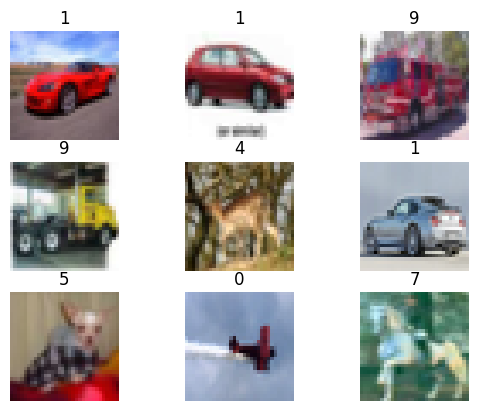

In [10]:
for image_batch, label_batch in train_dataset.take(1):
  for i in range(9):
    ax= plt.subplot(3,3, i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

plt.show()

configure dataset

In [11]:
train_size = int(len(train_dataset) *0.7)
test_size = int(len(train_dataset) *0.1)
val_size = int(len(train_dataset) *0.2)

In [12]:
print(train_size, test_size, val_size)

1094 156 312


In [13]:
train_ds = train_dataset.take(train_size)
val_ds = train_dataset.skip(train_size).take(val_size)
test_ds = train_dataset.skip(train_size+val_size).take(test_size)

In [14]:
print(train_ds)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


**Prefetch and shuffle**

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Model**

In [16]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(32,32,3)),
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(len(class_names), activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,418 (286.79 KB)

 Trainable params: 73,418 (286.79 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(
    optimizer="adam",
    loss=keras.losses.SparseCategoricalCrossentropy,
    metrics=["accuracy"]
)

In [19]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=20,
)

Epoch 1/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 60s 49ms/step - accuracy: 0.3183 - loss: 1.8391 - val_accuracy: 0.5140 - val_loss: 1.3606
Epoch 2/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 71s 43ms/step - accuracy: 0.5341 - loss: 1.3051 - val_accuracy: 0.5675 - val_loss: 1.2055
Epoch 3/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 46s 42ms/step - accuracy: 0.5987 - loss: 1.1344 - val_accuracy: 0.6232 - val_loss: 1.0624
Epoch 4/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.6417 - loss: 1.0138 - val_accuracy: 0.6357 - val_loss: 1.0393
Epoch 5/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.6737 - loss: 0.9353 - val_accuracy: 0.6598 - val_loss: 0.9683
Epoch 6/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 84s 44ms/step - accuracy: 0.6919 - loss: 0.8768 - val_accuracy: 0.6737 - val_loss: 0.9421
Epoch 7/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.7174 - loss: 0.8107 - val_accuracy: 0.6844 - val_loss: 0.9062
Epoch 8/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.7330 -

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

[]

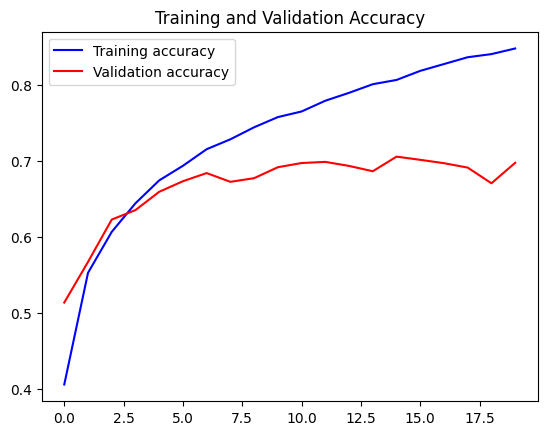

In [21]:
plt.plot( acc, 'b', label='Training accuracy')
plt.plot( val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.plot()

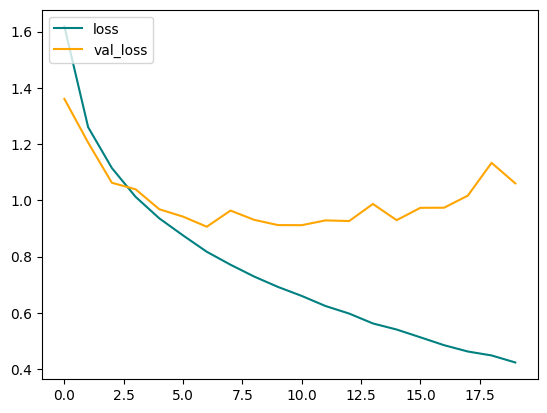

In [22]:
plt.plot(loss, color='teal', label='loss')
plt.plot(val_loss, color='orange', label='val_loss')
plt.legend(loc="upper left")
plt.show()

In [23]:
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 6s - 18ms/step - accuracy: 0.6913 - loss: 1.0985
Test accuracy: 0.6912999749183655


correct overfitting

In [24]:
#try data augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [25]:
from tensorflow.keras import regularizers
model2 = Sequential([
    layers.Rescaling(1./255, input_shape=(32,32,3)),
    data_augmentation,
    layers.Conv2D(32, (3,3), activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(len(class_names), activation="softmax")
])

In [26]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,418 (286.79 KB)

 Trainable params: 73,418 (286.79 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model2.compile(
    optimizer="adam",
    loss=keras.losses.SparseCategoricalCrossentropy,
    metrics=["accuracy"]
)

In [30]:
history2 = model2.fit(
    train_ds,
    validation_data = val_ds,
    epochs=20,
)

Epoch 1/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 53s 48ms/step - accuracy: 0.4758 - loss: 1.5740 - val_accuracy: 0.4877 - val_loss: 1.5360
Epoch 2/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.4927 - loss: 1.5362 - val_accuracy: 0.5017 - val_loss: 1.5174
Epoch 3/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 52s 48ms/step - accuracy: 0.4957 - loss: 1.5316 - val_accuracy: 0.5159 - val_loss: 1.4765
Epoch 4/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 52s 48ms/step - accuracy: 0.5042 - loss: 1.5173 - val_accuracy: 0.4838 - val_loss: 1.5503
Epoch 5/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 52s 48ms/step - accuracy: 0.5029 - loss: 1.5119 - val_accuracy: 0.5382 - val_loss: 1.4329
Epoch 6/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 83s 48ms/step - accuracy: 0.5077 - loss: 1.4999 - val_accuracy: 0.5123 - val_loss: 1.4803
Epoch 7/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.5124 - loss: 1.4942 - val_accuracy: 0.5451 - val_loss: 1.4321
Epoch 8/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 52s 48ms/step - accuracy: 0.5166 -

In [31]:
test_loss, test_acc = model2.evaluate(test_dataset, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 5s - 16ms/step - accuracy: 0.5470 - loss: 1.4272
Test accuracy: 0.546999990940094
